In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [5]:
img=cv2.imread('./test_images/test1.jfif')
img.shape

(183, 275, 3)

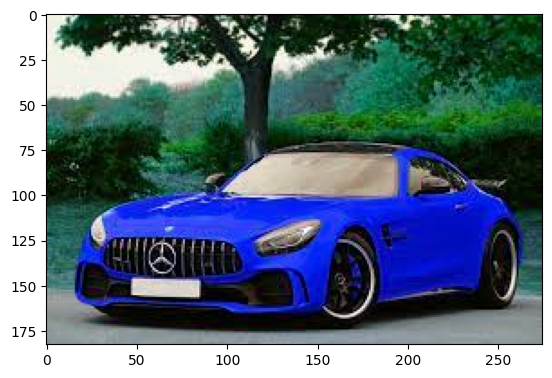

In [6]:
plt.imshow(img)

In [7]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [8]:
gray

array([[238, 238, 238, ...,  61,  43,  65],
       [238, 238, 238, ...,  58,  43,  61],
       [238, 238, 238, ...,  30,  21,  33],
       ...,
       [147, 147, 149, ..., 146, 146, 146],
       [143, 145, 148, ..., 145, 145, 145],
       [140, 143, 147, ..., 144, 144, 144]], dtype=uint8)

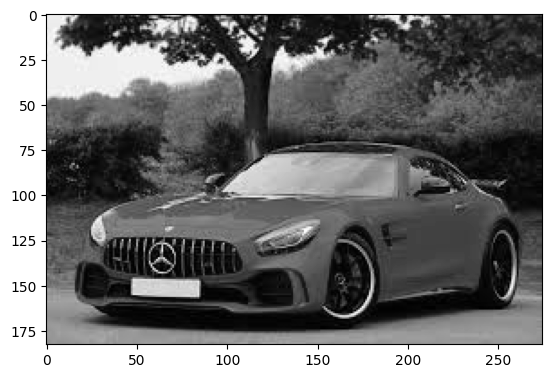

In [9]:
plt.imshow(gray, cmap='gray')

In [ ]:
import cv2

# Load the YOLOv3 model
net = cv2.dnn.readNet("openCV/yolov3.weights", "openCV/yolov3.cfg")

# Load class names
classes = []
with open("openCV/coco.names", "r") as f:
    classes = f.read().strip().split('\n')

# Load the image
image = cv2.imread("./test_images/test1.jfif")
height, width, _ = image.shape

# Perform object detection
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())

# Process the detected objects
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and classes[class_id] == 'car':
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Create a bounding box around the car
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Crop the car
            car_crop = image[y:y + h, x:x + w]

cv2.imshow("Car Detection", image)
cv2.imshow("Car Crop", car_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()
